## Lista_04


In [1]:
#imports
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import time

### ex 01


In [2]:
def francis(n, maxi, nook):
    k = 0
    e = 0
    matriz_a = np.zeros((n, n))
    V = np.identity(n)

    # matriz randomica mas canonica
    for i in range(n):
        for j in range(i, n):
            matriz_a[i, j] = matriz_a[j, i] = np.random.randint(0, 100)
            
            if i != j and abs(matriz_a[i, j]) > e:
                e = abs(matriz_a[i, j])

    while e > maxi and k < nook:
        Q, R = scp.linalg.qr(matriz_a)

        V = R @ V
        matriz_a = Q @ R

        # Recalculate e (maximum off-diagonal element)
        e = 0
        for i in range(n):
            for j in range(i + 1, n):
                if abs(matriz_a[i, j]) > e:
                    e = abs(matriz_a[i, j])

        k += 1

    return matriz_a, V

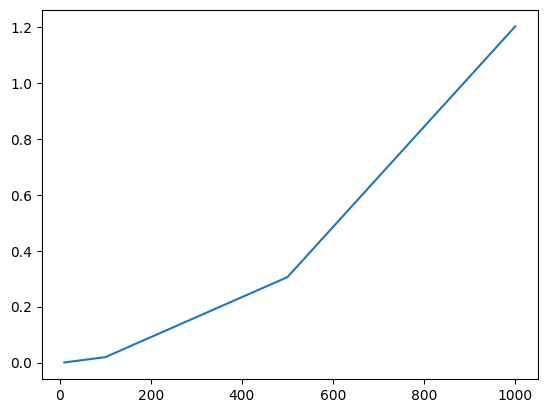

In [3]:
N = [10, 100, 500, 1000]

maxi = pow(10, 3)

t = 10**-8


lista = []

for i in N:
    t = time.time()
    francis(i, maxi, t)
    lista.append(time.time() - t)


#grafico de n pela lista
plt.plot(N, lista)

### ex 02


In [4]:
import numpy as np
import scipy.stats as scp

def criar_matriz_autovalores(n, autovalores):

    # Verificação de comprimento dos autovalores
    if len(autovalores) != n:
        raise ValueError("O número de autovalores deve ser igual à dimensão n da matriz.")

    # Criação da matriz diagonal D com os autovalores fornecidos
    D = np.diag(autovalores)

    # Geração de uma matriz ortogonal aleatória M
    M = scp.ortho_group.rvs(n)

    # Cálculo da matriz A usando a fórmula A = MDM^{-1}
    A = M @ D @ np.linalg.inv(M)

    return A

# Teste da função
n = 10
autovalores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

A = criar_matriz_autovalores(n, autovalores)
print("MATRIZ GERADA:\n", np.round(A, 2))

# Verificação dos autovalores da matriz gerada
autovalores_calculados, _ = np.linalg.eigh(A)
print("\nAutovalores calculados:\n", np.round(autovalores_calculados, 2))


MATRIZ GERADA:
 [[ 4.98  0.61 -2.06 -0.06  0.73 -0.27 -0.25  1.2   0.26 -0.23]
 [ 0.61  4.86 -1.55  0.63  0.29 -1.2   0.31  0.15 -1.06  0.81]
 [-2.06 -1.55  6.03  0.79  0.1   0.23  1.12  2.06  0.48 -0.56]
 [-0.06  0.63  0.79  4.55  0.99 -0.11 -0.82 -0.49  0.42  0.47]
 [ 0.73  0.29  0.1   0.99  6.77 -0.59  1.29 -0.63  0.19 -0.48]
 [-0.27 -1.2   0.23 -0.11 -0.59  3.39 -2.2  -0.83 -0.34 -0.32]
 [-0.25  0.31  1.12 -0.82  1.29 -2.2   7.81  0.49 -0.12 -0.23]
 [ 1.2   0.15  2.06 -0.49 -0.63 -0.83  0.49  5.57  0.77  1.73]
 [ 0.26 -1.06  0.48  0.42  0.19 -0.34 -0.12  0.77  5.85  0.3 ]
 [-0.23  0.81 -0.56  0.47 -0.48 -0.32 -0.23  1.73  0.3   5.2 ]]

Autovalores calculados:
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]



Dado o sistema dinâmico representado pela equação diferencial de segunda ordem:

\[
Mw'' + Kw = 0
\]

onde:
- \( M \) é a matriz de massa,
- \( K \) é a matriz de rigidez,
- \( w \) é o vetor de deslocamentos.

Assumimos uma solução para \( w(t) \) na forma de uma série de modos:

\[
w(t) = \sum_{k=1}^{n} \Phi^{(k)} c_k \sin(\omega_k t + \phi)
\]

onde:
- \( \Phi^{(k)} \) são os autovetores (ou modos de vibração),
- \( c_k \) são coeficientes constantes,
- \( \omega_k \) são as frequências naturais,
- \( \phi \) é a fase.

Calculamos a segunda derivada de \( w(t) \):

\[
w''(t) = -\sum_{k=1}^{n} \Phi^{(k)} c_k \sin(\omega_k t + \phi) \omega_k^2
\]

Substituímos \( w(t) \) e \( w''(t) \) na equação original \( Mw'' + Kw = 0 \):

\[
M \left( -\sum_{k=1}^{n} \Phi^{(k)} c_k \sin(\omega_k t + \phi) \omega_k^2 \right) + K \sum_{k=1}^{n} \ Phi^{(k)} c_k \sin(\omega_k t + \phi) = 0
]

Fatorando o termo comum \( \sum_{k=1}^{n} \Phi^{(k)} c_k \sin(\omega_k t + \phi) \):

\[
-\left( M \sum_{k=1}^{n} \Phi^{(k)} \omega_k^2 \right) c_k \sin(\omega_k t + \phi) + \left( K \sum_{k=1}^{n} \Phi^{(k)} \right) c_k \sin(\omega_k t + \phi) = 0
\]

Para que esta expressão seja válida para qualquer valor de \( t \), os coeficientes dos termos \( \sin(\omega_k t + \phi) \) devem ser iguais a zero:

\[
K \Phi^{(k)} = M \Phi^{(k)} \omega_k^2
\]

Esta é a condição de autovalores e autovetores para o sistema, indicando que:

\[
\boxed{K \Phi^{(k)} = M \Phi^{(k)} \omega_k^2}
\]

Esta equação mostra que os autovalores \( \omega_k^2 \) são as frequências naturais ao quadrado, e \( \Phi^{(k)} \) são os autovetores correspondentes. Em outras palavras, \( \omega_k^2 \) são os autovalores da matriz generalizada \( M^{-1} K \), e \( \Phi^{(k)} \) são os modos de vibração do sistema.

## EX 04


## EX 05


In [5]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

def index_to_flat(i, j, n_cols):
    return i + j * n_cols

def create_eigen_matrices(Nx, Ny, tension, density, thickness, dx, dy, radius):
    num_unknowns = Nx * Ny

    # Matriz de rigidez K: construí-la como uma matriz esparsa
    main_diag = 4.0 * np.ones(num_unknowns)
    off_diag_x = -1.0 * np.ones(num_unknowns - 1)
    off_diag_y = -1.0 * np.ones(num_unknowns - Nx)

    K = (tension / dx**2) * sp.diags(
        [off_diag_y, off_diag_x, main_diag, off_diag_x, off_diag_y],
        [-Nx, -1, 0, 1, Nx], format='csr'
    )

    # Forçar os autovalores associados aos pontos de contorno
    # a serem um número grande em comparação com os modos fundamentais
    large_value = 10000
    identity_matrix = large_value * sp.identity(num_unknowns, format='csr')

    for i in range(Nx):
        x_coord = i * dx
        for j in range(Ny):
            if (x_coord - 0.5)**2 + ((j * dy) - 0.5)**2 > radius**2:
                idx = index_to_flat(i, j, Nx)
                K[idx, :] = identity_matrix[idx, :]

    # Matriz de massa: caso simples, múltiplo da identidade
    M = density * thickness * sp.identity(num_unknowns, format='csr')

    return K, M

def plot_mode_shape(Nx, Ny, Lx, Ly, mode_shape):
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y)
    Z = mode_shape.reshape((Ny, Nx))

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    contour = ax.contourf(X, Y, Z, 20)
    ax.contour(X, Y, Z, 20, linewidths=0.25, colors='k')
    fig.colorbar(contour, ax=ax)
    plt.show()

# Parâmetros da grade
Nx = 41
Ny = 41
Lx = 1.0
LY= 1.0

# Parâmetros do material
tension = 1.0
density = 1.0
thickness = 1.0
radius = 0.5

# Parâmetros de discretização

sigma = 0.1

K,M = create_eigen_matrices(Nx, Ny, tension, density, thickness, Lx / (Nx - 1), Ly / (Ny - 1), radius)
Lam, Q = scp.sparse.linalg.eigsh(K, k=20, M=M, sigma=sigma)

K=14
mode = Q[:, K]
Wplot = plot_mode_shape(Nx, Ny, Lx, Ly, mode)
plot_mode_shape(Nx, Ny, Lx, Ly, mode)

